# Delhi Weather Forecasting

**Loading the basic libraries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA


**Loading Delhi Weather data set**

In [2]:
weather = pd.read_csv(r"testset.csv")

**Let's check first 5 and last 5 records of data set**

In [3]:
weather.head(5)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
weather.tail(5)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


### **Data Analysis**

In [5]:
weather_df = weather[['datetime_utc', ' _conds', ' _hum', ' _tempm']]

In [6]:
weather_df.head()

,datetime_utc,_conds,_hum,_tempm
0,19961101-11:00,Smoke,27.0,30.0
1,19961101-12:00,Smoke,32.0,28.0
2,19961101-13:00,Smoke,44.0,24.0
3,19961101-14:00,Smoke,41.0,24.0
4,19961101-16:00,Smoke,47.0,23.0


**Let's rename few columns for our better understanding**

In [7]:
weather_df = weather_df.rename(columns={' _conds': 'condition', ' _hum': 'humidity', ' _tempm': 'temperature'})

In [8]:
weather_df.head()

,datetime_utc,condition,humidity,temperature
0,19961101-11:00,Smoke,27.0,30.0
1,19961101-12:00,Smoke,32.0,28.0
2,19961101-13:00,Smoke,44.0,24.0
3,19961101-14:00,Smoke,41.0,24.0
4,19961101-16:00,Smoke,47.0,23.0


In [9]:
weather_df.shape

(100990, 4)

In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1   condition     100918 non-null  object 
 2   humidity      100233 non-null  float64
 3   temperature   100317 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.1+ MB


In [11]:
weather_df.duplicated().sum()

0

**Let's convert datatype of datetime column**

In [12]:
from datetime import datetime
weather_df['datetime_utc']=pd.to_datetime(weather_df['datetime_utc'],infer_datetime_format=True)

In [13]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   datetime_utc  100990 non-null  datetime64[ns]
 1   condition     100918 non-null  object        
 2   humidity      100233 non-null  float64       
 3   temperature   100317 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.1+ MB


**Now, let's set datetime_utc column as index**

In [14]:
weather_df = weather_df.set_index('datetime_utc',inplace=False)

In [15]:
weather_df.head()

,condition,humidity,temperature
datetime_utc,,,
1996-11-01 11:00:00,Smoke,27.0,30.0
1996-11-01 12:00:00,Smoke,32.0,28.0
1996-11-01 13:00:00,Smoke,44.0,24.0
1996-11-01 14:00:00,Smoke,41.0,24.0
1996-11-01 16:00:00,Smoke,47.0,23.0


**Let's analyze the missing values now**

<AxesSubplot:ylabel='datetime_utc'>

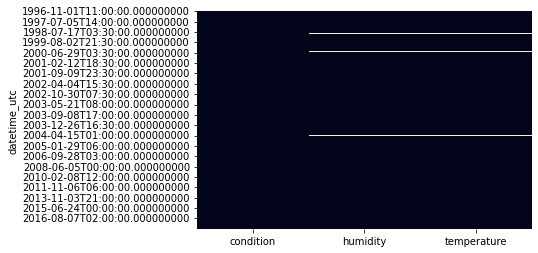

In [16]:
sns.heatmap(weather_df.isnull(), cbar=False)

In [17]:
pip install missingno

You should consider upgrading via the 'C:\Users\avuda\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:>

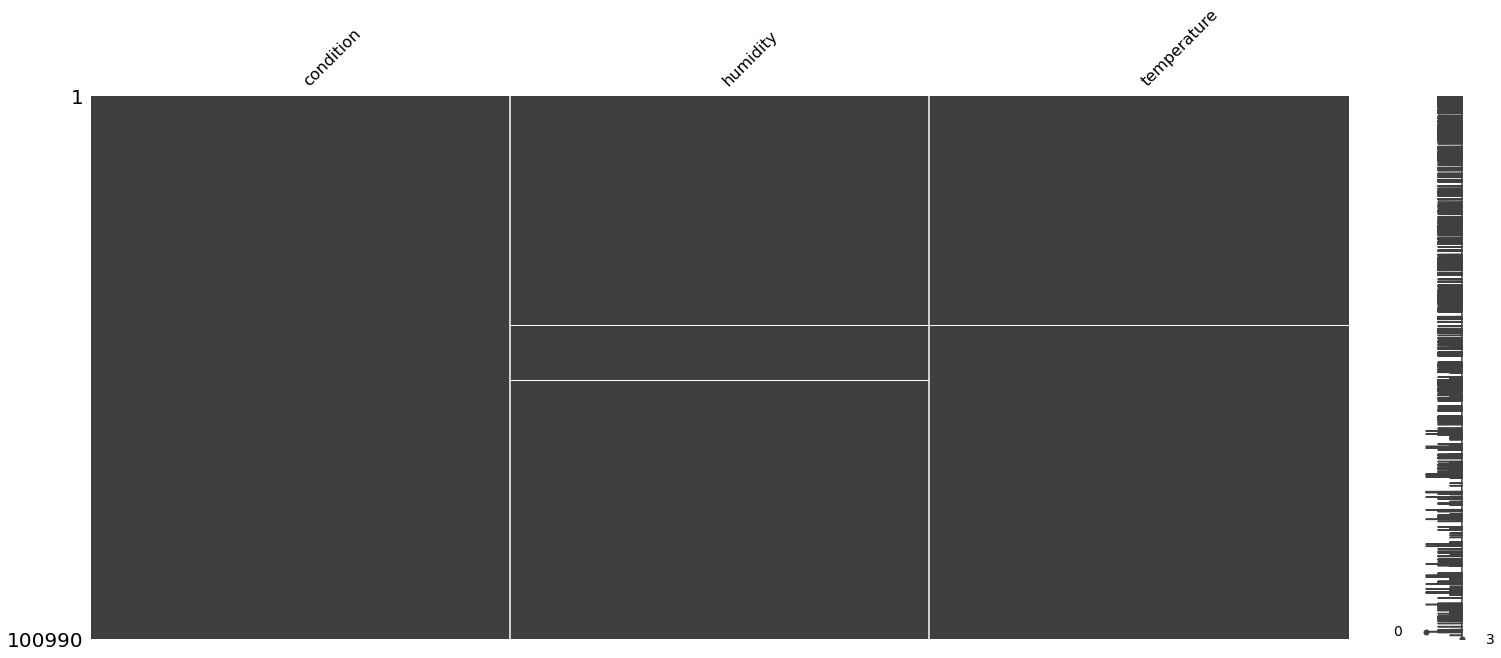

In [18]:
import missingno as msno
msno.matrix(weather_df)

<AxesSubplot:>

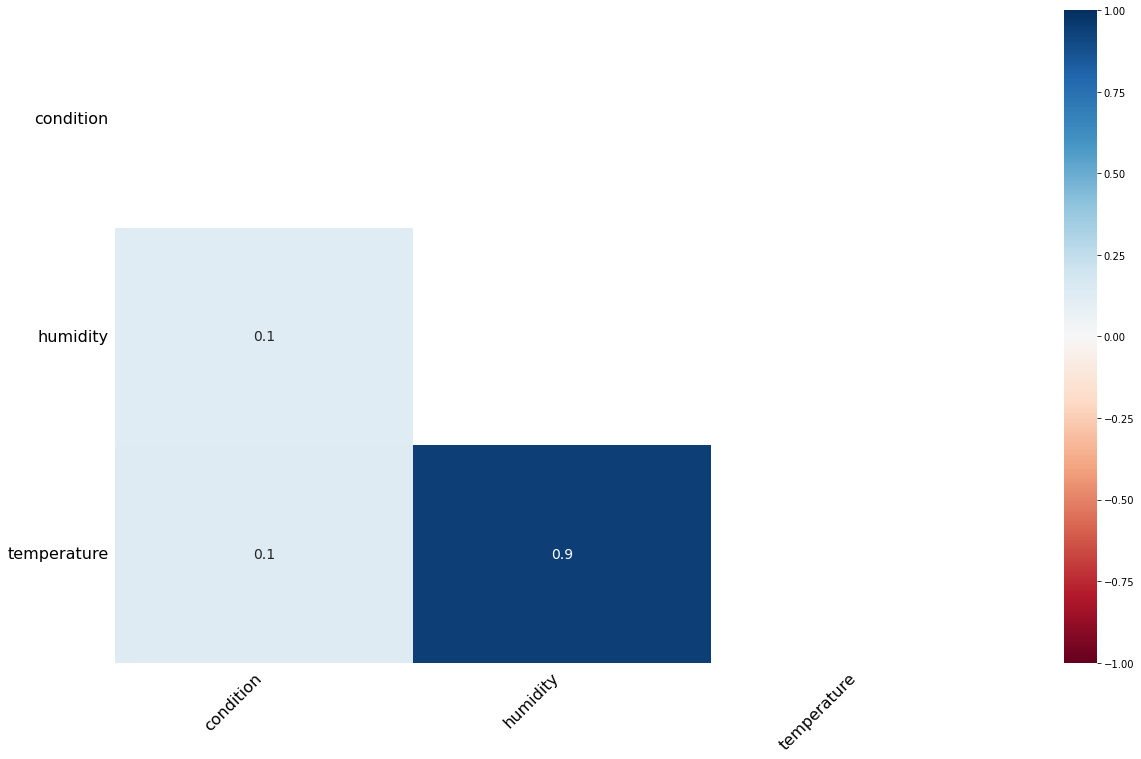

In [19]:
msno.heatmap(weather_df)

Not many values are missing, but it will still be great to fill the missing ones instead of removing entire row.

In [20]:
weather_df.ffill(inplace=True)

In [21]:
weather_df.isnull().sum()

condition      0
humidity       0
temperature    0
dtype: int64

**So, here we have cleaned the data.**

### **Exploratory Data Analysis**

In [22]:
weather_df['condition'].value_counts().sort_index()

Blowing Sand                       378
Clear                             3129
Drizzle                            112
Fog                               2760
Funnel Cloud                         2
Haze                             47639
Heavy Fog                          421
Heavy Rain                          28
Heavy Thunderstorms and Rain        22
Heavy Thunderstorms with Hail        1
Light Drizzle                      414
Light Fog                           64
Light Freezing Rain                  1
Light Hail Showers                   1
Light Haze                           4
Light Rain                        1302
Light Rain Showers                   5
Light Sandstorm                      6
Light Thunderstorm                  64
Light Thunderstorms and Rain       176
Mist                              9389
Mostly Cloudy                     1537
Overcast                           326
Partial Fog                       1036
Partly Cloudy                     2092
Patches of Fog           

<AxesSubplot:title={'center':'Delhi Weather Condition'}, xlabel='condition', ylabel='count'>

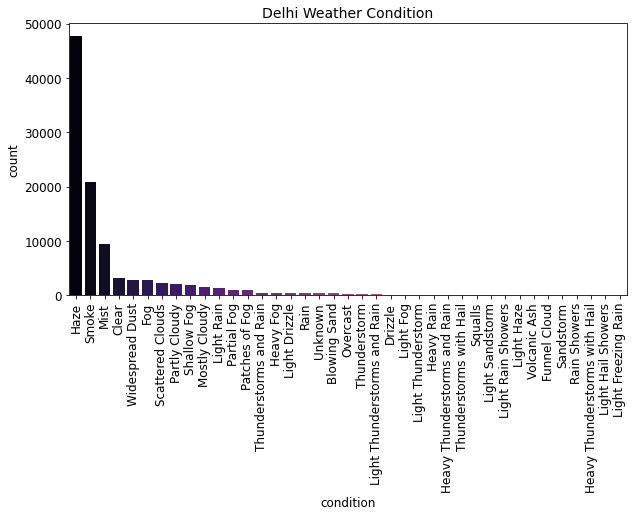

In [23]:
plt.figure(figsize=(10,5))
plt.title('Delhi Weather Condition', fontsize=14)
plt.xlabel("Weather", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
sns.countplot(x = "condition", data = weather_df, palette='magma', order=weather_df["condition"].value_counts().index)

**Look at the above plot, it is really so bad that mostly Delhi has Hazy and Smoky weather conditions, it shows the level of pollution city has.**

### **Time Series Analysis**

**We have to predict the temperature of Delhi, so, let's drop condition & humidity column.**

In [24]:
weather_time_df = weather_df[['temperature']]
weather_time_df.head()

,temperature
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [25]:
weather_time_df=weather_time_df.resample('D').mean()

In [26]:
weather_time_df.isna().sum()

temperature    141
dtype: int64

In [27]:
weather_time_df.fillna(weather_df['temperature'].mean(),inplace=True)

In [28]:
weather_time_df.isna().sum()

temperature    0
dtype: int64

In [29]:
weather_time_df.head()

,temperature
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000


In [30]:
weather_time_df.tail()

,temperature
datetime_utc,
2017-04-20,34.500
2017-04-21,34.250
2017-04-22,32.900
2017-04-23,32.875
2017-04-24,32.000


**Let's plot the data**

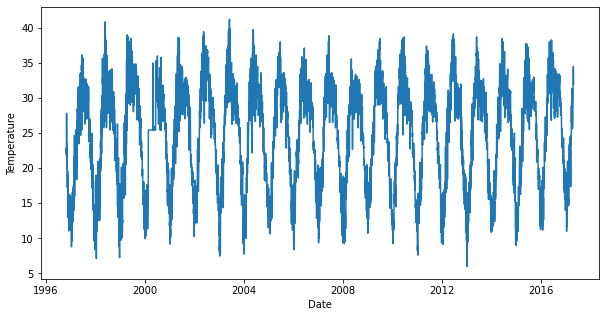

In [31]:
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.plot(weather_time_df)

**So above plots shows that we do have some seasonality but there is no trend. Let's check rolling statistics. Also, perform the ADCF test(Dickey-Fuller Test)**

In [32]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(10,5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    weather_test = adfuller(timeseries['temperature'], autolag='AIC')
    dfoutput = pd.Series(weather_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in weather_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

**From the above graph the mean values are correlating with the actual values and the standard deviation does not seem to vary.**

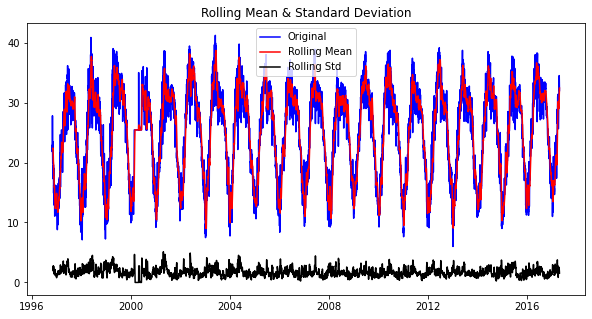

Results of Dickey Fuller Test:
Test Statistic                -7.363693e+00
p-value                        9.355907e-11
#Lags Used                     3.600000e+01
Number of Observations Used    7.443000e+03
Critical Value (1%)           -3.431229e+00
Critical Value (5%)           -2.861928e+00
Critical Value (10%)          -2.566977e+00
dtype: float64


In [33]:
test_stationarity(weather_time_df)

**From the above graph the mean values are correlating with the actual values and the standard deviation does not seem to vary. Also, Test statistic is less than Critical Values, so we already have STATIONARY Time Series. So our 'd' value will become 0 in ARIMA Model.**

### **Plotting ACF & PACF**

In [34]:
lag_acf = acf(weather_time_df.diff().dropna().values, nlags=20)
lag_pacf = pacf(weather_time_df.diff().dropna().values, nlags=20, method='ols')

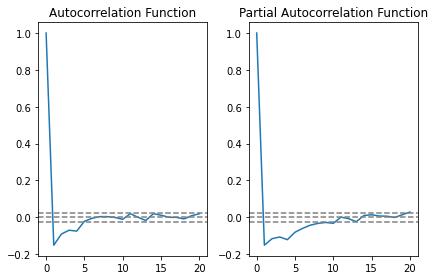

In [35]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(weather_time_df.diff().values)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(weather_time_df.diff().values)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(weather_time_df.diff().values)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(weather_time_df.diff().values)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

**From the ACF graph, we can see that curve touches y=0.0 line at x=1. Thus, from theory, Q = 1 From the PACF graph, we see that curve touches y=0.0 line at x=1. Thus, from theory, P = 1**

Plotting ARIMA model


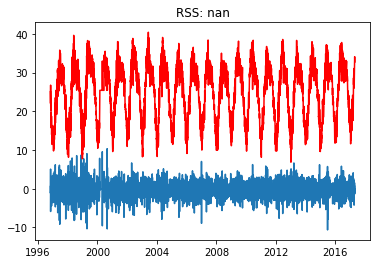

In [51]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(weather_time_df['temperature'], order=(1,0,1))
results_ARIMA = model.fit()
plt.plot(weather_time_df['temperature'].diff())
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - weather_time_df.diff()['temperature'])**2))
print('Plotting ARIMA model')


### **Predictions**

In [37]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

datetime_utc
1996-11-01    25.083115
1996-11-02    22.410473
1996-11-03    22.861961
1996-11-04    22.054401
1996-11-05    22.636933
Freq: D, dtype: float64

In [38]:
pred=predictions_ARIMA_diff.to_frame()

In [39]:
pred.columns = ['Forecasted']
pred["Date"]=pred.index
pred["Actual"]=weather_time_df["temperature"]

In [40]:
pred.dtypes

Forecasted           float64
Date          datetime64[ns]
Actual               float64
dtype: object

In [41]:
pred.sort_values(by='Date', inplace = True,ascending=False)
pred=pred.drop(['Date'], axis=1)

# Errors

In [42]:
pred["forecast_errors"] = [pred["Actual"][i]-pred["Forecasted"][i] for i in range(len(pred["Forecasted"]))]
from statistics import mean
from numpy import sqrt 
print("Mean absolute error =",mean( abs(pred["forecast_errors"])))
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(pred["Actual"], pred["Forecasted"])
print('Mean Squared Error: %f' % mse)
print("rmse =",sqrt(mse))

Mean absolute error = 1.2572684338361575
Mean Squared Error: 2.899841
rmse = 1.702891944087058


In [43]:
bias = sum(pred["forecast_errors"]) * 1.0/len(pred["forecast_errors"])
print("BIAS =",bias)

BIAS = 0.0011258963520484994


In [44]:
pred.head(10)

,Forecasted,Actual,forecast_errors
datetime_utc,,,
2017-04-24,32.756309,32.000000,-0.756309
2017-04-23,32.981827,32.875000,-0.106827
2017-04-22,34.059984,32.900000,-1.159984
2017-04-21,34.111658,34.250000,0.138342
2017-04-20,33.345708,34.500000,1.154292
2017-04-19,33.478717,33.500000,0.021283
2017-04-18,32.102254,34.000000,1.897746
2017-04-17,30.878961,32.555556,1.676595
2017-04-16,30.919138,31.000000,0.080862


In [45]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

datetime_utc
1996-11-01     25.083115
1996-11-02     47.493589
1996-11-03     70.355550
1996-11-04     92.409951
1996-11-05    115.046884
Freq: D, dtype: float64

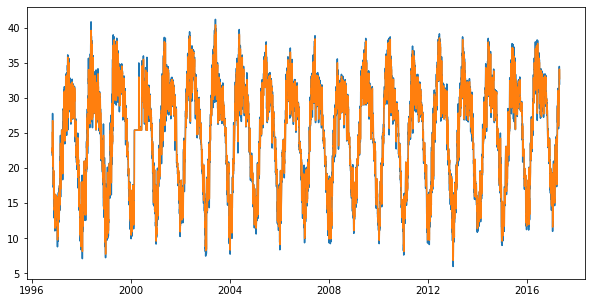

In [46]:
plt.figure(figsize=(10,5))
plt.plot(weather_time_df)
plt.plot(predictions_ARIMA_diff)

**From above plot, we can see that our predicted forecasts are very close to the real time series values. It also indicates a fairly accurate model.**

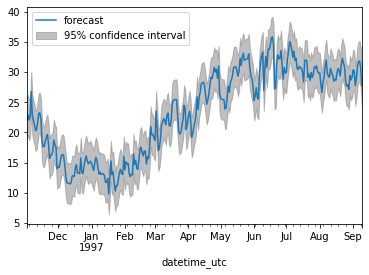

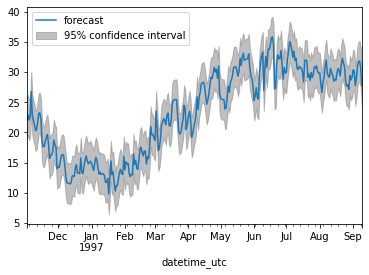

In [55]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(results_ARIMA,1,312)